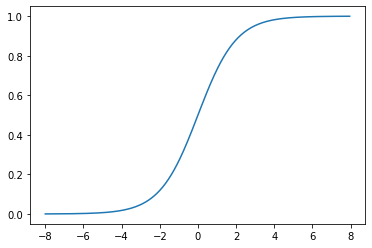

In [1]:
import matplotlib.pyplot as plt
import numpy as np
 
 
def sigmoid(x):
    # 直接返回sigmoid函数
    return 1. / (1. + np.exp(-x))
 
 

# param:起点，终点，间距
x = np.arange(-8, 8, 0.05)
y = sigmoid(x)
plt.plot(x, y)
plt.savefig('sig.pdf')
plt.show()


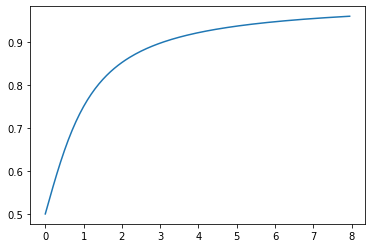

In [2]:
def at(x):
    y = np.arctan(x)/np.pi + 0.5
    return y
x = np.arange(0, 8, 0.05)
z = at(x)
plt.plot(x, z)
plt.savefig('s2.pdf')
plt.show()

In [17]:
from random import random 
def printIntro():          #打印程序介绍信息
    print("myx进行比赛分析结果：")
    print("程序运行需要A和B的能力值（以0到1之间的小数表示）")
def getInputs():           #获得程序运行参数
    a = eval(input("请输入A的能力值(0-1): "))
    b = eval(input("请输入B的能力值(0-1): "))
    n = eval(input("模拟比赛的场次: "))
    return a, b, n
def simNGames(n, probA, probB):    # 进行N场比赛
    winsA, winsB = 0, 0
    for i in range(n):
        for j in range(5):           #进行5局3胜的比赛
            scoreA, scoreB = simOneGame(probA, probB)
            if scoreA > scoreB:
                winsA += 1
            else:
                winsB += 1
    return winsA, winsB
def gameOver(a,b):               #正常比赛结束
    return a==11 or b==11
def gameOver2(a,b):              #进行抢12比赛结束
    return a==12 or b==12
def simOneGame(probA, probB):         #进行一场比赛
    scoreA, scoreB = 0, 0           #初始化AB的得分
    serving = "A"                 
    while not gameOver(scoreA, scoreB):     #用while循环来执行比赛
        if scoreA==10 and scoreB==10:
            return(simtwoGame2(probA,probB))
        if serving == "A":
            if random() < probA:            ##用随机数生成胜负
                scoreA += 1
            else:
                serving="B"
        else:
            if random() < probB:
                scoreB += 1
            else:
                serving="A"
    return scoreA, scoreB
def simtwoGame2(probA,probB):
    scoreA,scoreB=10,10
    serving = "A"                 #假如先让队伍A发球
    while not gameOver2(scoreA, scoreB):
        if serving == "A":
            if random() < probA:
                scoreA += 1
            else:
                serving="B"
        else:
            if random() < probB:
                scoreB += 1
            else:
                serving="A"
    return scoreA, scoreB
def printSummary(winsA, winsB):
    n = winsA + winsB
    print("竞技分析开始，共模拟{}场比赛".format(n))
    print("A获胜{}场比赛，占比{:0.1%}".format(winsA, winsA/n))
    print("B获胜{}场比赛，占比{:0.1%}".format(winsB, winsB/n))


In [18]:
def lose(a,b,n=1000):
    # printIntro()
    probA, probB, n = a,b,n
    winsA, winsB = simNGames(n, probA, probB)
    return -winsA/(winsA + winsB)
def win(a,b,n=1000):
    # printIntro()
    probA, probB, n = a,b,n
    winsA, winsB = simNGames(n, probA, probB)
    return winsB/(winsA + winsB)
def expt(a,b,n=1000):
    e = win(a,b,n) + lose(a,b,n)
    return e
expt(0.5,0.5)

-0.08939999999999998

In [19]:
def cap(l):
    cap0 = []
    for i in range(3):
        c = (l[i%3] + l[(i+1)%3])/2
        cap0.append(c)
    return cap0
cap1 = [(l1[0]+l1[1])/2,(l1[0]+l1[2])/2,(l1[1]+l1[2])/2]
cap2 = [(l2[0]+l2[1])/2,(l2[0]+l2[2])/2,(l2[1]+l2[2])/2]
# cap1 = cap(l1)
# cap2 = cap(l2)
cap1,cap2

([0.4882732146322952, 0.4884433165672371, 0.48741173041470487],
 [0.43556596778606416, 0.4284844749813217, 0.42741610352518244])

In [5]:
def loss(x,r=1):
    x = x/exp(0.1*r)
    return x

In [38]:
r1 = expt(cap2[0],cap1[0])+expt(l2[2],l1[2])+expt(loss(l2[1]),loss(l1[1]))
r2 = expt(cap2[0],cap1[1])+expt(l2[2],l1[1])+expt(loss(l2[1]),loss(l1[2]))
r3 = expt(cap2[0],cap1[2])+expt(l2[2],l1[0])+expt(loss(l2[1]),loss(l1[1]))
r1,r2,r3

(0.7208000000000001, 0.6901999999999999, 0.7475999999999999)

In [39]:
r1 = expt(cap2[1],cap1[0])+expt(l2[1],l1[2])+expt(loss(l2[2]),loss(l1[1]))
r2 = expt(cap2[1],cap1[1])+expt(l2[1],l1[1])+expt(loss(l2[2]),loss(l1[2]))
r3 = expt(cap2[1],cap1[2])+expt(l2[1],l1[0])+expt(loss(l2[2]),loss(l1[1]))
r1,r2,r3

(0.7263999999999999, 0.7398, 0.7388)

In [40]:
r1 = expt(cap2[2],cap1[0])+expt(l2[0],l1[2])+expt(loss(l2[2]),loss(l1[1]))
r2 = expt(cap2[2],cap1[1])+expt(l2[0],l1[1])+expt(loss(l2[2]),loss(l1[2]))
r3 = expt(cap2[2],cap1[2])+expt(l2[0],l1[0])+expt(loss(l2[2]),loss(l1[1]))
r1,r2,r3

(0.7432000000000001, 0.742, 0.7498)

In [32]:
ll1 = [loss(i) for i in l1]
ll2 = [loss(i) for i in l2]
r = []
r.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[2],ll1[1])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[2],ll1[1])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[1]))
r


[0.4872,
 0.5068,
 0.5049999999999999,
 0.49679999999999996,
 0.5109999999999999,
 0.49460000000000004,
 0.5050000000000001,
 0.5146,
 0.49839999999999995,
 0.5176000000000001,
 0.5102,
 0.493,
 0.42219999999999996,
 0.40920000000000006,
 0.5209999999999999,
 0.4986,
 0.4332,
 0.39339999999999997,
 0.5244,
 0.5236000000000001,
 0.3884,
 0.40580000000000005,
 0.5052,
 0.501,
 0.43200000000000005,
 0.4129999999999999,
 0.5032,
 0.501,
 0.4216000000000001,
 0.42,
 0.5042,
 0.49439999999999995,
 0.4135999999999999,
 0.4136000000000001,
 0.504,
 0.5179999999999999]

In [33]:
rr = []
for i in range(len(r)//2):
    rr.append(min(r[2*i],r[2*i+1]))
rrr = []
for i in range(len(rr)//2):
    rrr.append(max(rr[2*i],rr[2*i+1]))
rrr

[0.49679999999999996,
 0.5050000000000001,
 0.49839999999999995,
 0.4986,
 0.5236000000000001,
 0.501,
 0.501,
 0.49439999999999995,
 0.504]

In [34]:
r4 = []
cnt = 0
for i in range(2,-1,-1):
    for j in range(2,-1,-1):
        r4.append(expt(l2[i],l1[j])+rrr[cnt])
        cnt += 1
r4

[0.7949999999999999,
 0.7888000000000002,
 0.7773999999999999,
 0.707,
 0.7372000000000001,
 0.7314,
 0.7098,
 0.6832,
 0.7021999999999999]

In [35]:
r5 = []
cnt = 0
for i in range(3):
    for j in range(3):
        r5.append(expt(cap2[i],cap1[j])+r4[cnt])
        cnt += 1
r5

[1.008,
 1.0048000000000001,
 0.9825999999999998,
 0.9467999999999999,
 1.002,
 0.9802000000000001,
 0.9702,
 0.9394,
 0.9471999999999999]

In [6]:
from numpy import *
l = [12494,12212,10356,8709,8375,8034,7999,7864,7357,7086,6723,6531,6485,5995,5871,5841,5822,5623,5538,5487,5482,5023,4673,4650,4557,4469,4384,4214,4175,4122,4113,4056]
p = [12494,12212,10356,8709,8375,8034,7999,7864,7357,7086,6723,6531,6485,5995,5871,5841]
g = [(i-mean(p))/std(p) for i in l]

In [7]:
g

[2.2369753390850344,
 2.0967370140426334,
 1.1737500236926477,
 0.35469852956202985,
 0.18860065522103026,
 0.019021687705219267,
 0.0016162218311624214,
 -0.06551914654019969,
 -0.3176497522015374,
 -0.4524177879692347,
 -0.6329373340344528,
 -0.728418746829279,
 -0.7512945019780394,
 -0.9949710242148352,
 -1.0566361033114937,
 -1.0715550740606854,
 -1.0810037555351735,
 -1.1799662615048108,
 -1.2222366786275203,
 -1.247598928901146,
 -1.2500854240260113,
 -1.4783456764886425,
 -1.652400335229211,
 -1.6638382128035911,
 -1.710087022126085,
 -1.7538493363237138,
 -1.7961197534464233,
 -1.880660587691842,
 -1.9000552496657912,
 -1.926412097989363,
 -1.9308877892141205,
 -1.9592338336375845]

In [8]:
s = [sigmoid(i) for i in g]
s

[0.9035211180694284,
 0.8905856290909023,
 0.7638221811166316,
 0.5877564944908611,
 0.5470108973999692,
 0.5047552785457717,
 0.5004040553698353,
 0.48362607038979555,
 0.421248627788986,
 0.38878606931053317,
 0.3468448049016636,
 0.32554181840930846,
 0.32053930077267423,
 0.26993132619259,
 0.25795282435617706,
 0.2551074645892022,
 0.25331611224803136,
 0.2350582625616839,
 0.22754307622056982,
 0.22311605244884203,
 0.2226853518677656,
 0.1856774251319733,
 0.1607848012499175,
 0.159247435145593,
 0.15315242893640377,
 0.14756234169833304,
 0.14232406148641502,
 0.13231301550324318,
 0.13010222131929067,
 0.12714823870253344,
 0.12665234784525867,
 0.12354998826146836]

In [9]:
ss = [np.arctan(i)/np.pi + 0.5 for i in s]
ss

[0.7338804388095789,
 0.7315988916808487,
 0.7076299653921264,
 0.6691397760718646,
 0.6593285551221807,
 0.6487922346450671,
 0.6476864928749635,
 0.6433867848689008,
 0.6269066233099463,
 0.618029933905745,
 0.6062713188297544,
 0.600179084920031,
 0.5987372037710768,
 0.5839217093932101,
 0.5803571891513317,
 0.5795074057437956,
 0.5789718126632821,
 0.5734873035891512,
 0.5712166347769853,
 0.5698755619546801,
 0.5697449548797193,
 0.5584374597610186,
 0.550745083072971,
 0.5502679416104483,
 0.5483740540441024,
 0.5466340157844335,
 0.5450009315354813,
 0.5418733163193985,
 0.5411815087088363,
 0.5402565307190476,
 0.5401011853918183,
 0.5391288910971516]

In [10]:
arc = [np.arctan(i)/np.pi + 0.5 for i in g]

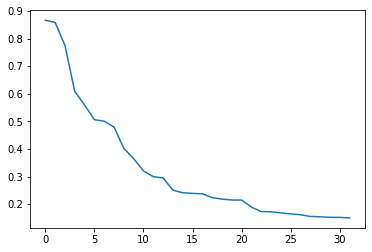

In [11]:
plt.plot(arc)

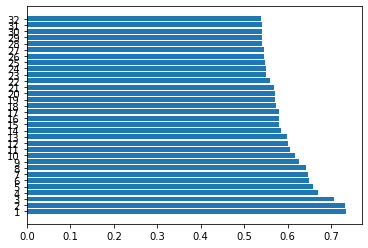

In [12]:
fig, ax = plt.subplots()
b = ax.barh(range(1,len(ss)+1),ss)
ax.set_yticks(range(1,len(ss)+1))
# ax.set_yticklabels(s.index)
# plt.savefig('cap.pdf')
plt.show()

In [13]:
sss = [sigmoid(i)  for i in s]
sss

[0.7116725556554493,
 0.709011011066556,
 0.6821829948520208,
 0.6428502159471523,
 0.6334418187132039,
 0.6235761868315108,
 0.622554281014259,
 0.6186037521239551,
 0.603781996887397,
 0.5959904360727348,
 0.5858522437975838,
 0.5806742388521668,
 0.5794556782541778,
 0.567076045568181,
 0.5641329842624795,
 0.5634332201765063,
 0.562992540129973,
 0.5584954787693072,
 0.5566415908031946,
 0.5555487657018824,
 0.5554424170117453,
 0.5462864512475796,
 0.5401098284075854,
 0.539727936719975,
 0.5382134429364831,
 0.5368237909143256,
 0.5355210756189235,
 0.5330300805270078,
 0.5324797539648204,
 0.5317443045409357,
 0.5316208295950893,
 0.5308482665085424]

In [14]:
l1 = [i for i in ss[:3]]
l2 = [ss[6],ss[9],ss[16]]
l1[0] = l1[0]*.9
l1[1] = l1[1]*.899
l1[2] = l1[2]*.9301
l2[0] = l2[0]*0.91
l2[1] = l2[1]*0.949
l2[2] = l2[2]*0.98
l1 = [i/(exp(0.1*3)) for i in l1]
l2 = [i/(exp(0.1*3)) for i in l2]

In [15]:
l1,l2

([0.48930480078482746, 0.48724162847976304, 0.48758183234964675],
 [0.4366343392422034, 0.4344975963299249, 0.4203346107204399])

In [28]:
ll1 = [loss(i) for i in l1]
ll2 = [loss(i) for i in l2]
r = []
r.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[2],ll1[1])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[2],ll1[1])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[0]))
r


[0.3926,
 0.41600000000000004,
 0.4418,
 0.4062000000000001,
 0.4098,
 0.4344000000000001,
 0.4444000000000001,
 0.41080000000000005,
 0.40740000000000004,
 0.42080000000000006,
 0.427,
 0.4184,
 0.5056,
 0.49240000000000006,
 0.5118,
 0.4864,
 0.47900000000000004,
 0.5104,
 0.5137999999999999,
 0.47580000000000006,
 0.5056,
 0.4872,
 0.49539999999999995,
 0.5118,
 0.4818,
 0.48179999999999995,
 0.49240000000000006,
 0.5254000000000001,
 0.49520000000000003,
 0.502,
 0.5278,
 0.48739999999999994,
 0.508,
 0.5191999999999999,
 0.5304,
 0.5065999999999999]

In [29]:
rr = []
for i in range(len(r)//2):
    rr.append(min(r[2*i],r[2*i+1]))
rrr = []
for i in range(len(rr)//2):
    rrr.append(max(rr[2*i],rr[2*i+1]))
rrr

[0.4062000000000001,
 0.41080000000000005,
 0.4184,
 0.49240000000000006,
 0.47900000000000004,
 0.49539999999999995,
 0.49240000000000006,
 0.49520000000000003,
 0.508]

In [30]:
r4 = []
cnt = 0
for i in range(2,-1,-1):
    for j in range(2,-1,-1):
        r4.append(expt(l2[i],l1[j])+rrr[cnt])
        cnt += 1
r4

[0.6944000000000001,
 0.72,
 0.7198,
 0.6994,
 0.6862,
 0.7252000000000001,
 0.6856,
 0.6962,
 0.7338]

In [31]:
r5 = []
cnt = 0
for i in range(3):
    for j in range(3):
        r5.append(expt(cap2[i],cap1[j])+r4[cnt])
        cnt += 1
r5

[0.9032,
 0.9510000000000001,
 0.9242,
 0.9538000000000001,
 0.9402,
 0.9766000000000001,
 0.9383999999999999,
 0.9708,
 0.9813999999999999]

In [36]:
r = []
r.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[0]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[1]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[2],ll1[1])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[0]))
r.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[1]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[2],ll1[1])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[0]))
r.append(expt(ll2[1],ll1[1])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[1]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[2]))
r.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[1]))
r1 = []
r1.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[2]))
r1.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[2]))
r1.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[2]))
r1.append(expt(ll2[1],ll1[1])+expt(ll2[0],ll1[2]))
r1.append(expt(ll2[0],ll1[0])+expt(ll2[1],ll1[1]))
r1.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[1]))
r1.append(expt(ll2[1],ll1[0])+expt(ll2[0],ll1[1]))
r1.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[1]))
r1.append(expt(ll2[0],ll1[1])+expt(ll2[1],ll1[0]))
r1.append(expt(ll2[0],ll1[2])+expt(ll2[1],ll1[0]))
r1.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[0]))
r1.append(expt(ll2[1],ll1[2])+expt(ll2[0],ll1[0]))
r1.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[2]))
r1.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[2]))
r1.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[2]))
r1.append(expt(ll2[2],ll1[1])+expt(ll2[0],ll1[2]))
r1.append(expt(ll2[0],ll1[0])+expt(ll2[2],ll1[1]))
r1.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[1]))
r1.append(expt(ll2[2],ll1[0])+expt(ll2[0],ll1[1]))
r1.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[1]))
r1.append(expt(ll2[0],ll1[1])+expt(ll2[2],ll1[0]))
r1.append(expt(ll2[0],ll1[2])+expt(ll2[2],ll1[0]))
r1.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[0]))
r1.append(expt(ll2[2],ll1[2])+expt(ll2[0],ll1[0]))
r1.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[2]))
r1.append(expt(ll2[1],ll1[1])+expt(ll2[2],ll1[2]))
r1.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[2]))
r1.append(expt(ll2[2],ll1[1])+expt(ll2[1],ll1[2]))
r1.append(expt(ll2[1],ll1[0])+expt(ll2[2],ll1[1]))
r1.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[1]))
r1.append(expt(ll2[2],ll1[0])+expt(ll2[1],ll1[1]))
r1.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[1]))
r1.append(expt(ll2[1],ll1[1])+expt(ll2[2],ll1[0]))
r1.append(expt(ll2[1],ll1[2])+expt(ll2[2],ll1[0]))
r1.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[0]))
r1.append(expt(ll2[2],ll1[2])+expt(ll2[1],ll1[0]))

In [38]:
r0 = [i + j for i, j in zip(r, r1)]
r0

[0.9092,
 0.895,
 0.9352,
 0.9196,
 0.9072,
 0.9141999999999999,
 0.9346000000000001,
 0.9128000000000001,
 0.9322,
 0.9324000000000001,
 0.9281999999999999,
 0.9335999999999999,
 0.9345999999999999,
 0.9234,
 0.9724,
 0.9702000000000002,
 0.9099999999999999,
 0.9298,
 0.9747999999999999,
 1.01,
 0.9128000000000001,
 0.8904000000000001,
 1.0168,
 1.0116,
 0.9401999999999999,
 0.8997999999999999,
 1.0221999999999998,
 0.9924,
 0.9432,
 0.9426000000000001,
 1.0286,
 1.017,
 0.922,
 0.9417999999999999,
 0.9978,
 1.0156]

In [39]:
rr = []
for i in range(len(r0)//2):
    rr.append(min(r0[2*i],r0[2*i+1]))
rrr = []
for i in range(len(rr)//2):
    rrr.append(max(rr[2*i],rr[2*i+1]))
rrr

[0.9196,
 0.9128000000000001,
 0.9322,
 0.9702000000000002,
 0.9747999999999999,
 1.0116,
 0.9924,
 1.017,
 0.9978]

In [40]:
r4 = []
cnt = 0
for i in range(2,-1,-1):
    for j in range(2,-1,-1):
        r4.append(expt(l2[i],l1[j])+rrr[cnt])
        cnt += 1
r4

[1.206,
 1.2196000000000002,
 1.2554,
 1.1974000000000002,
 1.1772,
 1.2214,
 1.1867999999999999,
 1.2233999999999998,
 1.2146000000000001]

In [41]:
r5 = []
cnt = 0
for i in range(3):
    for j in range(3):
        r5.append(expt(cap2[i],cap1[j])+r4[cnt])
        cnt += 1
r5

[1.4308,
 1.4382000000000001,
 1.4412,
 1.4578000000000002,
 1.4252,
 1.4702,
 1.4349999999999998,
 1.4777999999999998,
 1.4662000000000002]